## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import accuracy_score
import pandas as pd


wine = datasets.load_wine()
print(pd.Series(wine.target).value_counts())
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size = .3,random_state = 9)

df = pd.DataFrame(wine['data'])
df.columns = (wine['feature_names'])
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)
predict_y = model.predict(x_test)

print(f"accuracy_score = {accuracy_score(predict_y,y_test)}")

print(f"predict_y:{predict_y}")
print(f"y_test:       {y_test}")


1    71
0    59
2    48
dtype: int64
accuracy_score = 0.9444444444444444
predict_y:[0 0 0 2 0 0 2 2 2 1 2 0 2 1 1 0 1 1 0 0 0 0 1 0 0 2 1 1 0 1 0 1 1 0 1 2 2
 0 1 1 2 0 0 1 2 0 0 1 2 0 2 1 1 0]
y_test:       [0 0 0 2 0 0 2 2 2 1 2 0 2 1 1 0 1 1 0 0 0 0 0 0 0 2 1 1 0 1 0 1 1 0 1 2 2
 0 1 1 2 0 0 2 2 0 0 0 2 0 2 1 1 0]


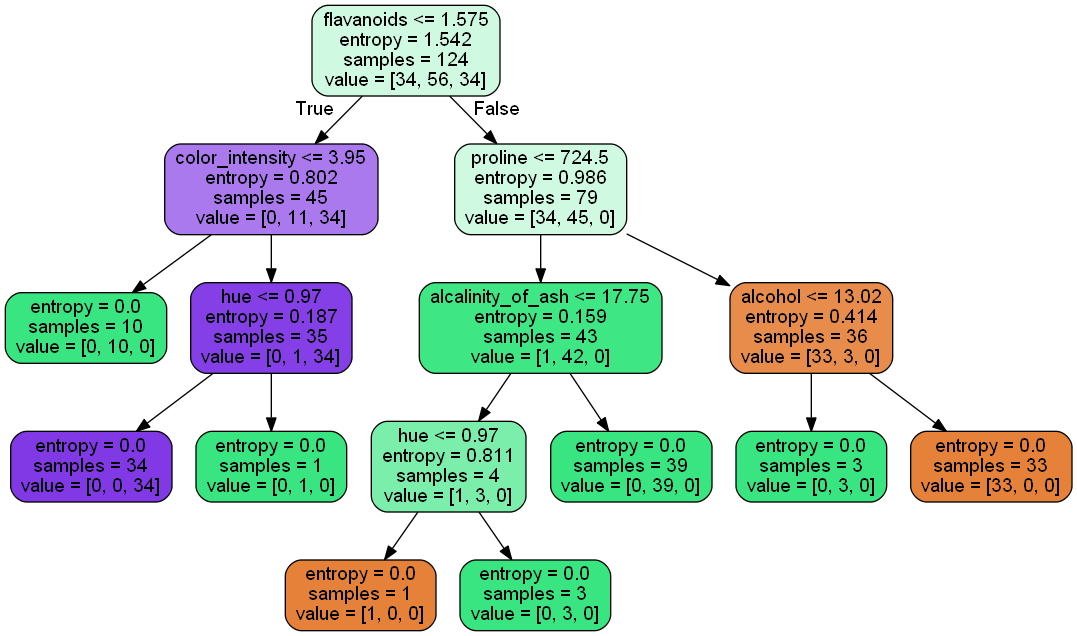

In [79]:
from sklearn import tree
from IPython.display import Image
import pydotplus
out_file = tree.export_graphviz(
    model,
    feature_names   = wine.feature_names,
    filled          = True,
    rounded         = True
)
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())

In [47]:
#regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

boston = datasets.load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size = .15,random_state = 9)

model = DecisionTreeRegressor(random_state = 1)
model.fit(x_train,y_train)
predict_y = model.predict(x_test)

print(f"mean_squared_error:{mean_squared_error(predict_y,y_test)}")

print(f"cross_val_score:{cross_val_score(model,x_test,y_test,cv = 5).mean()}")

boston.feature_names

#df = pd.DataFrame(data = x_test, columns = boston.feature_names)
#for col in df.columns:
 #   plt.scatter(df[col],y_test,label = col)

#plt.plot(x_test,predict_y)
#plt.show()

mean_squared_error:29.955526315789466
cross_val_score:0.6918950462056133


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [76]:
#visualize
model_2th = DecisionTreeRegressor()
model_2th.fit(x_train[0].reshape(1,-1),[y_train[0]])
predict_y = model_2th.predict(x_test[0].reshape(1,-1))
predict_y

array([16.5])

In [77]:
out_file = tree.export_graphviz(model,
                        feature_names = boston.feature_names)
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png)

FileNotFoundError: No such file or directory: '<function Dot.__init__.<locals>.<lambda> at 0x14EA62B0>'

FileNotFoundError: No such file or directory: '<function Dot.__init__.<locals>.<lambda> at 0x14EA62B0>'

<IPython.core.display.Image object>

In [43]:
feat = pd.Series(data = model.feature_importances_,index = boston.feature_names)
feat_names  = list(feat.sort_values(ascending = False).index)
print(feat_names)
print(feat[feat > .01])


['RM', 'LSTAT', 'DIS', 'CRIM', 'NOX', 'RAD', 'AGE', 'TAX', 'PTRATIO', 'B', 'INDUS', 'CHAS', 'ZN']
CRIM     0.044857
NOX      0.039885
RM       0.569569
AGE      0.012788
DIS      0.075151
RAD      0.016992
TAX      0.012244
LSTAT    0.208499
dtype: float64


mean_squared_error:15.965000000000002
cross_val_score = 0.7286534172371606


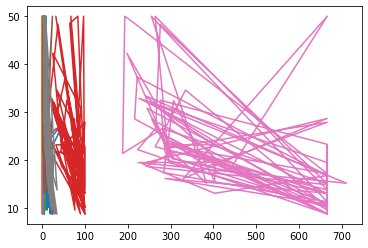

In [46]:
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
train_X = df[df.columns[feat > .01]]
x_train,x_test,y_train,y_test = train_test_split(train_X,boston.target,test_size = .15,random_state = 9)
model = DecisionTreeRegressor(random_state = 1)
model.fit(x_train,y_train)

predict_y = model.predict(x_test)
print(f"mean_squared_error:{mean_squared_error(predict_y,y_test)}")

print(f"cross_val_score = {cross_val_score(model,x_test,y_test,cv = 5).mean()}")

#for col in df:
#    plt.scatter(df[col],boston.target)
    
plt.plot(x_test,predict_y)
plt.show()